## Example of MMS

Burges' Equation or Bateman–Burgers equation is a fundamental partial differential equation occurring in various areas of applied mathematics, such as:
- fluid mechanics
- nonlinear acoustics
- gas dynamics
- traffic flow. 

The equation was first introduced by Harry Bateman in 1915 and later studied by Johannes Martinus Burgers in 1948. More references at 
[Wikipedia](https://en.wikipedia.org/wiki/Burgers%27_equation)


$$\frac{\partial u}{\partial t} = -u \frac{\partial u}{\partial x} + \alpha \frac{\partial^2 u}{\partial t^2}$$ 

In compact notation

$$u_t = -u u_x + \alpha u_{xx}$$

Solution

$$U(t,x) = A + \sin\left(x + C t\right)$$

valid for 

\begin{align}
\left[x=0,t=0\right]& \implies& C=-A\\
\left[x=1,t=0\right]& \implies& \alpha = \cos(1)\\
\end{align}


In [25]:
import numpy as np
# import sympy as sp
# import sympy  
from sympy import * 

In [18]:
A, C, x, t = symbols('A C x t')
U = A + sin(x + C*t)
Derivative(U,t).doit() 

In [19]:
U*Derivative(U,x).doit()

In [21]:
alpha = Symbol('alpha')
alpha * Derivative(U,x,2).doit()

Burges equation

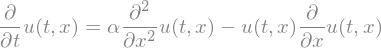

In [39]:
u = Function('u')(t,x)
BurgesEq = Eq(Derivative(u,t),  - u*Derivative(u,x) + alpha * Derivative(u,x,2))
BurgesEq

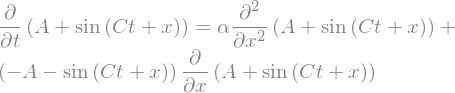

In [40]:
BurgesEqU = Eq(Derivative(U,t),  - U*Derivative(U,x) + alpha * Derivative(U,x,2))
BurgesEqU

In [41]:
BurgesEqU.doit()

In [43]:
BurgesEqU.subs(x,0).doit()

### Source term _Q(t,x)_

Source term $Q(t,x)$ will be added to the Burges equation for $u(t,x)$
$$L(u) = u_t + u u_x - \alpha u_{xx} = 0$$

The source term is $L(\cdot)$ over $U(t,x)$

$$Q(t,x) = L(U(t,x)) = U_t +U U_x - \alpha U_{xx}$$

In [26]:
Q = Derivative(U,t) + U * Derivative(U,x) - alpha * Derivative(U,x,2)

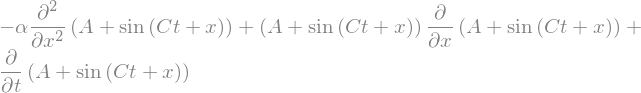

In [27]:
Q

In [28]:
Q.doit()

$$u_t = -u u_x + u_{xx} + Q(t,x)$$

The numerical solution will be affected for the numerical error of the code 

Try to do the same width 
\begin{align}
    \frac{\partial T}{\partial t} - \kappa \nabla^2 T &= B\\
    T &= -4 x (x-1) (x -3/4) (x - 1/4)\\
\end{align}

$\kappa$ is 

Plot $B$ and $T$